**BUSINESS DECISION MODELLING - FINAL PROJECT**

**TEAM 5**

Nilesh Vatsyayan

Jonathan Rucinski

Samuel Terr

# **1. Data Prep & EDA**

In [ ]:
# Import Required Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *

# Packages to import stock data
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

# Mount Google Drive to access Stock Data
from google.colab import drive
drive.mount('/content/drive')

# Install Pyomo
!pip install -q pyomo
from pyomo.environ import *

try:
    import google.colab
    try:
        from pyomo.environ import *
    except:
        !pip install -q pyomo
    if not 'ipopt_executable' in vars():
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
        ipopt_executable = '/content/ipopt' # THIS IS NEW! We are using the IPOPT Solver.
except:
    pass

# Install Bonmin Solver
!wget -N -q "https://ampl.com/dl/open/bonmin/bonmin-linux64.zip"
!unzip -o -q bonmin-linux64


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Select Tickers**

In [ ]:
# Ticker list generated for the required stocks that we wish to scrap
tickers_list = ['CZR','TSCO','SBUX','WM','BA','CSX','INTC','NVDA','MSFT']
# Import historical price data for each stock
dow_prices = {ticker : si.get_data(ticker,start_date = '1/1/2017',end_date='1/1/2022',interval='1d') for ticker in tickers_list}
# Print Results
dow_prices

/usr/local/lib/python3.8/dist-packages/yahoo_fin/stock_info.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['ticker'] = ticker.upper()


{'CZR':                   open        high         low       close    adjclose  \
 2017-01-03   17.100000   17.500000   16.549999   17.049999   17.049999   
 2017-01-04   17.200001   17.350000   16.549999   16.900000   16.900000   
 2017-01-05   16.850000   17.150000   16.400000   16.650000   16.650000   
 2017-01-06   16.750000   16.799999   16.500000   16.600000   16.600000   
 2017-01-09   16.200001   16.450001   15.650000   16.100000   16.100000   
 2017-01-10   16.250000   16.600000   16.100000   16.500000   16.500000   
 2017-01-11   16.600000   16.750000   16.200001   16.700001   16.700001   
 2017-01-12   16.549999   16.645000   16.049999   16.150000   16.150000   
 2017-01-13   16.250000   16.500000   15.900000   16.000000   16.000000   
 2017-01-17   15.850000   15.950000   15.350000   15.450000   15.450000   
 2017-01-18   15.500000   16.200001   15.400000   15.800000   15.800000   
 2017-01-19   15.800000   15.900000   15.500000   15.550000   15.550000   
 2017-01-20   15.5

## Prep and analyze data

In [ ]:
# Extract the adjclose data for CZR
prep_data = pd.DataFrame(dow_prices['CZR']['adjclose']).rename(columns = {"adjclose":"CZR"})

# Loop to extract and combine the required data from all of the stocks
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
prep_data


CZR        TSCO        SBUX          WM          BA  \
2017-01-03   17.049999   69.516373   49.080559   62.980900  145.533707   
2017-01-04   16.900000   70.331512   49.648071   62.802292  147.063446   
2017-01-05   16.650000   69.269096   50.064835   63.043434  147.146927   
2017-01-06   16.600000   68.838600   50.658932   62.686188  147.508469   
2017-01-09   16.100000   69.030945   51.607742   62.320004  146.785339   
2017-01-10   16.500000   69.928505   51.323986   62.061020  147.480652   
2017-01-11   16.700001   70.065903   51.519070   62.632599  147.786636   
2017-01-12   16.150000   69.562164   51.456997   62.418262  146.757492   
2017-01-13   16.000000   69.653763   51.297375   62.328934  147.258163   
2017-01-17   15.450000   70.853577   51.430397   62.052090  146.182648   
2017-01-18   15.800000   69.983459   51.829430   62.150326  146.785339   
2017-01-19   15.550000   68.499710   51.332851   62.132446  147.415771   
2017-01-20   15.500000   68.893578   51.128910   62.212856  147.907135   
2017-01-23   15.400000   68.426468   51.217579   61.927052  146.340271   
2017-01-24   15.950000   68.838600   51.820560   62.123524  148.852844   
2017-01-25   16.000000   68.902733   52.051105   62.221771  155.166687   
2017-01-26   15.500000   68.682907   51.838280   62.275360  156.798462   
2017-01-27   15.500000   68.105881   49.763340   62.194984  155.481949   
2017-01-30   15.100000   68.215775   49.568253   62.159260  153.507095   
2017-01-31   15.500000   67.473915   48.965271   62.069946  151.513748   
2017-02-01   15.600000   66.283287   47.794811   61.784149  152.023682   
2017-02-02   15.650000   67.510544   47.768188   62.194984  150.438232   
2017-02-03   16.000000   67.116722   48.823410   62.203918  150.568069   
2017-02-06   15.500000   67.116722   49.417515   61.998489  152.032913   
2017-02-07   15.400000   67.025124   49.203739   62.427204  154.369354   
2017-02-08   15.500000   66.887756   49.185921   62.525440  153.181747   
2017-02-09   15.600000   67.354866   49.711456   62.739773  153.621246   
2017-02-10   16.150000   68.005135   50.076668   62.998772  155.444717   
2017-02-13   16.250000   67.006805   49.978668   63.266697  157.127945   
2017-02-14   16.000000   67.226646   50.397324   63.284554  157.567444   
2017-02-15   16.600000   66.612991   50.646721   63.722157  158.315536   
2017-02-16   16.400000   64.891098   50.530933   63.570351  159.727585   
2017-02-17   16.549999   66.109230   51.083168   64.704559  161.504288   
2017-02-21   16.400000   66.786995   51.252419   65.034988  164.169403   
2017-02-22   16.400000   66.219147   51.279137   65.204704  163.982361   
2017-02-23   16.049999   65.245064   51.341476   65.115410  165.385040   
2017-02-24   16.100000   65.401283   51.198975   65.329712  165.927414   
2017-02-27   16.150000   65.539124   50.575462   65.410118  167.788284   
2017-02-28   16.299999   65.162361   50.655628   65.481575  168.536392   
2017-03-01   17.150000   66.090508   50.896126   65.526199  171.977646   
2017-03-02   17.700001   66.706169   50.878311   65.445824  171.117340   
2017-03-03   18.200001   66.522392   50.860497   65.043938  170.359863   
2017-03-06   18.049999   65.961838   50.486382   65.204704  169.190979   
2017-03-07   18.000000   65.640221   50.058838   64.927841  170.210236   
2017-03-08   18.100000   66.807274   49.649101   64.851486  169.948395   
2017-03-09   17.750000   66.136444   49.159206   64.950294  168.854355   
2017-03-10   18.049999   66.632652   48.571320   65.579147  167.105667   
2017-03-13   18.700001   65.888306   48.660397   65.668976  167.432938   
2017-03-14   19.150000   65.925087   48.339745   65.561180  167.133713   
2017-03-15   19.700001   66.402939   48.580235   66.279854  167.115021   
2017-03-16   18.600000   66.081329   48.811817   65.677948  166.628754   
2017-03-17   18.850000   65.585091   49.684746   66.064262  168.414841   
2017-03-20   18.650000   65.171555   49.711456   65.677948  167.750885   
2017-03-21   17.600000 

In [ ]:
# Remove N/A values from data
prep_data.dropna(inplace=True)
prep_data

CZR        TSCO        SBUX          WM          BA  \
2017-01-03   17.049999   69.516373   49.080559   62.980900  145.533707   
2017-01-04   16.900000   70.331512   49.648071   62.802292  147.063446   
2017-01-05   16.650000   69.269096   50.064835   63.043434  147.146927   
2017-01-06   16.600000   68.838600   50.658932   62.686188  147.508469   
2017-01-09   16.100000   69.030945   51.607742   62.320004  146.785339   
2017-01-10   16.500000   69.928505   51.323986   62.061020  147.480652   
2017-01-11   16.700001   70.065903   51.519070   62.632599  147.786636   
2017-01-12   16.150000   69.562164   51.456997   62.418262  146.757492   
2017-01-13   16.000000   69.653763   51.297375   62.328934  147.258163   
2017-01-17   15.450000   70.853577   51.430397   62.052090  146.182648   
2017-01-18   15.800000   69.983459   51.829430   62.150326  146.785339   
2017-01-19   15.550000   68.499710   51.332851   62.132446  147.415771   
2017-01-20   15.500000   68.893578   51.128910   62.212856  147.907135   
2017-01-23   15.400000   68.426468   51.217579   61.927052  146.340271   
2017-01-24   15.950000   68.838600   51.820560   62.123524  148.852844   
2017-01-25   16.000000   68.902733   52.051105   62.221771  155.166687   
2017-01-26   15.500000   68.682907   51.838280   62.275360  156.798462   
2017-01-27   15.500000   68.105881   49.763340   62.194984  155.481949   
2017-01-30   15.100000   68.215775   49.568253   62.159260  153.507095   
2017-01-31   15.500000   67.473915   48.965271   62.069946  151.513748   
2017-02-01   15.600000   66.283287   47.794811   61.784149  152.023682   
2017-02-02   15.650000   67.510544   47.768188   62.194984  150.438232   
2017-02-03   16.000000   67.116722   48.823410   62.203918  150.568069   
2017-02-06   15.500000   67.116722   49.417515   61.998489  152.032913   
2017-02-07   15.400000   67.025124   49.203739   62.427204  154.369354   
2017-02-08   15.500000   66.887756   49.185921   62.525440  153.181747   
2017-02-09   15.600000   67.354866   49.711456   62.739773  153.621246   
2017-02-10   16.150000   68.005135   50.076668   62.998772  155.444717   
2017-02-13   16.250000   67.006805   49.978668   63.266697  157.127945   
2017-02-14   16.000000   67.226646   50.397324   63.284554  157.567444   
2017-02-15   16.600000   66.612991   50.646721   63.722157  158.315536   
2017-02-16   16.400000   64.891098   50.530933   63.570351  159.727585   
2017-02-17   16.549999   66.109230   51.083168   64.704559  161.504288   
2017-02-21   16.400000   66.786995   51.252419   65.034988  164.169403   
2017-02-22   16.400000   66.219147   51.279137   65.204704  163.982361   
2017-02-23   16.049999   65.245064   51.341476   65.115410  165.385040   
2017-02-24   16.100000   65.401283   51.198975   65.329712  165.927414   
2017-02-27   16.150000   65.539124   50.575462   65.410118  167.788284   
2017-02-28   16.299999   65.162361   50.655628   65.481575  168.536392   
2017-03-01   17.150000   66.090508   50.896126   65.526199  171.977646   
2017-03-02   17.700001   66.706169   50.878311   65.445824  171.117340   
2017-03-03   18.200001   66.522392   50.860497   65.043938  170.359863   
2017-03-06   18.049999   65.961838   50.486382   65.204704  169.190979   
2017-03-07   18.000000   65.640221   50.058838   64.927841  170.210236   
2017-03-08   18.100000   66.807274   49.649101   64.851486  169.948395   
2017-03-09   17.750000   66.136444   49.159206   64.950294  168.854355   
2017-03-10   18.049999   66.632652   48.571320   65.579147  167.105667   
2017-03-13   18.700001   65.888306   48.660397   65.668976  167.432938   
2017-03-14   19.150000   65.925087   48.339745   65.561180  167.133713   
2017-03-15   19.700001   66.402939   48.580235   66.279854  167.115021   
2017-03-16   18.600000   66.081329   48.811817   65.677948  166.628754   
2017-03-17   18.850000   65.585091   49.684746   66.064262  168.414841   
2017-03-20   18.650000   65.171555   49.711456   65.677948  167.750885   
2017-03-21   17.600000 

In [ ]:
# return feature created for each ticker, pct_change will be used as the return
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = prep_data[i].pct_change()
return_data

CZR      TSCO      SBUX        WM        BA       CSX  \
2017-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2017-01-04 -0.008798  0.011726  0.011563 -0.002836  0.010511  0.020619   
2017-01-05 -0.014793 -0.015106  0.008394  0.003840  0.000568  0.009828   
2017-01-06 -0.003003 -0.006215  0.011867 -0.005667  0.002457  0.014328   
2017-01-09 -0.030120  0.002794  0.018729 -0.005842 -0.004902 -0.014126   
2017-01-10  0.024845  0.013002 -0.005498 -0.004156  0.004737  0.011625   
2017-01-11  0.012121  0.001965  0.003801  0.009210  0.002075  0.016569   
2017-01-12 -0.032934 -0.007189 -0.001205 -0.003422 -0.006964  0.008938   
2017-01-13 -0.009288  0.001317 -0.003102 -0.001431  0.003412  0.010943   
2017-01-17 -0.034375  0.017225  0.002593 -0.004442 -0.007304 -0.018299   
2017-01-18  0.022654 -0.012280  0.007759  0.001583  0.004123 -0.031767   
2017-01-19 -0.015823 -0.021201 -0.009581 -0.000288  0.004295  0.234002   
2017-01-20 -0.003215  0.005750 -0.003973  0.001294  0.003333 -0.025928   
2017-01-23 -0.006452 -0.006780  0.001734 -0.004594 -0.010594  0.037446   
2017-01-24  0.035714  0.006023  0.011773  0.003173  0.017169  0.015220   
2017-01-25  0.003135  0.000932  0.004449  0.001581  0.042417  0.023560   
2017-01-26 -0.031250 -0.003190 -0.004089  0.000861  0.010516  0.016949   
2017-01-27  0.000000 -0.008401 -0.040027 -0.001291 -0.008396 -0.011111   
2017-01-30 -0.025806  0.001614 -0.003920 -0.000574 -0.012701 -0.011860   
2017-01-31  0.026490 -0.010875 -0.012165 -0.001437 -0.012985 -0.023163   
2017-02-01  0.006452 -0.017646 -0.023904 -0.004604  0.003366  0.015089   
2017-02-02  0.003205  0.018515 -0.000557  0.006650 -0.010429 -0.016564   
2017-02-03  0.022364 -0.005833  0.022090  0.000144  0.000863  0.010365   
2017-02-06 -0.031250  0.000000  0.012168 -0.003303  0.009729  0.010045   
2017-02-07 -0.006452 -0.001365 -0.004326  0.006915  0.015368  0.008887   
2017-02-08  0.006494 -0.002049 -0.000362  0.001574 -0.007693  0.005872   
2017-02-09  0.006452  0.006983  0.010685  0.003428  0.002869 -0.004379   
2017-02-10  0.035256  0.009654  0.007347  0.004128  0.011870  0.000419   
2017-02-13  0.006192 -0.014680 -0.001957  0.004253  0.010828  0.002931   
2017-02-14 -0.015385  0.003281  0.008377  0.000282  0.002797  0.001878   
2017-02-15  0.037500 -0.009128  0.004949  0.006915  0.004748 -0.013750   
2017-02-16 -0.012048 -0.025849 -0.002286 -0.002382  0.008919  0.007393   
2017-02-17  0.009146  0.018772  0.010929  0.017842  0.011123  0.017823   
2017-02-21 -0.009063  0.010252  0.003313  0.005107  0.016502  0.007622   
2017-02-22  0.000000 -0.008502  0.000521  0.002610 -0.001139 -0.010632   
2017-02-23 -0.021341 -0.014710  0.001216 -0.001369  0.008554 -0.009919   
2017-02-24  0.003115  0.002394 -0.002776  0.003291  0.003279  0.015714   
2017-02-27  0.003106  0.002108 -0.012178  0.001231  0.011215  0.004744   
2017-02-28  0.009288 -0.005749  0.001585  0.001092  0.004459 -0.003080   
2017-03-01  0.052147  0.014244  0.004748  0.000681  0.020418  0.013386   
2017-03-02  0.032070  0.009315 -0.000350 -0.001227 -0.005002 -0.013209   
2017-03-03  0.028249 -0.002755 -0.000350 -0.006141 -0.004427  0.018946   
2017-03-06 -0.008242 -0.008427 -0.007356  0.002472 -0.006861  0.006265   
2017-03-07 -0.002770 -0.004876 -0.008468 -0.004246  0.006024 -0.027113   
2017-03-08  0.005556  0.017780 -0.008185 -0.001176 -0.001538 -0.016309   
2017-03-09 -0.019337 -0.010041 -0.009867  0.001524 -0.006437 -0.001469   
2017-03-10  0.016901  0.007503 -0.011959  0.009682 -0.010356  0.004624   
2017-03-13  0.036011 -0.011171  0.001834  0.001370  0.001958  0.005858   
2017-03-14  0.024064  0.000558 -0.006590 -0.001642 -0.001787 -0.005200   
2017-03-15  0.028721  0.007248  0.004975  0.010962 -0.000112  0.002509   
2017-03-16 -0.055838 -0.004843  0.004767 -0.009081 -0.002910 -0.007299   
2017-03-17  0.013441 -0.007510  0.017884  0.005882  0.010719 -0.015126   
2017-03-20 -0.010610 -0.006305  0.000538 -0.005848 -0.003942  0.000000   
2017-03-21 -0.056300 

In [ ]:
# Check the dimensions of the dataset
return_data.shape

(1259, 9)

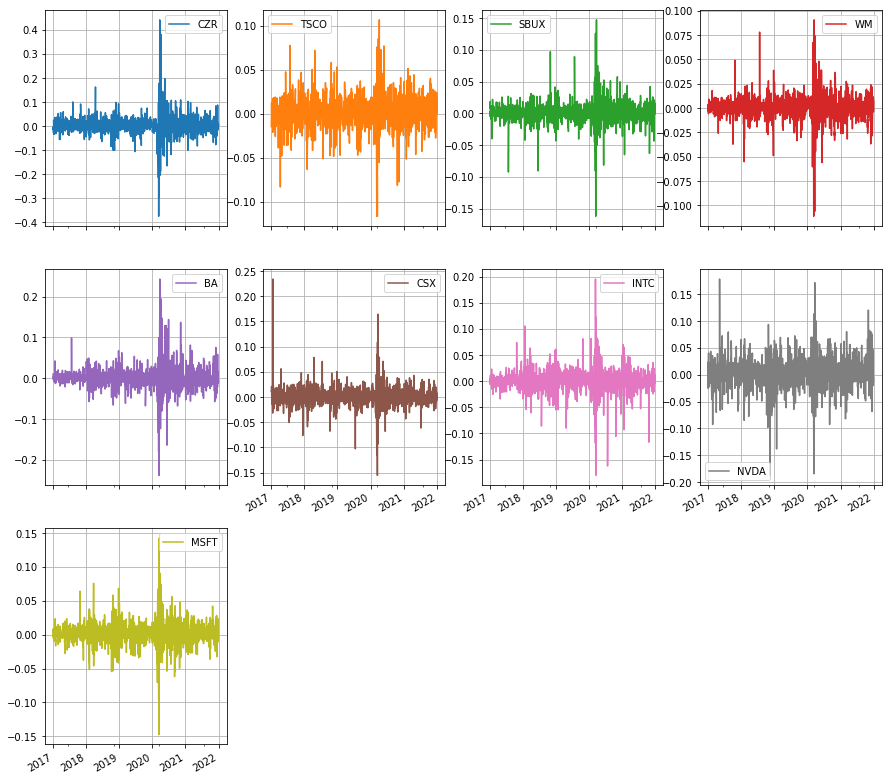

In [ ]:
# Print Return Data plots for all stocks
return_data.plot(subplots=True,
        grid=True,
        layout=(3,4),
         figsize=(15,15))
plt.show()

We can see that **major fluctuation** can be witnessed in all the stocks starting around **March 2020**. This can be attributed to the COVID-19 lockdowns that greatly affected all sectors of the market.

In [ ]:
# Create CSV file of stock dataframe
return_data.to_csv('group5data.csv')

In [ ]:
# Import .CSV file
df = pd.read_csv('/content/drive/My Drive/group5data.csv')
df.head()

Unnamed: 0       CZR      TSCO      SBUX        WM        BA       CSX  \
0  2017-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
1  2017-01-04 -0.008798  0.011726  0.011563 -0.002836  0.010511  0.020619   
2  2017-01-05 -0.014793 -0.015106  0.008394  0.003840  0.000567  0.009828   
3  2017-01-06 -0.003003 -0.006215  0.011867 -0.005666  0.002457  0.014328   
4  2017-01-09 -0.030120  0.002794  0.018729 -0.005842 -0.004903 -0.014126   

       INTC      NVDA      MSFT  
0       NaN       NaN       NaN  
1 -0.005191  0.023331 -0.004474  
2 -0.001648 -0.025386  0.000000  
3  0.003576  0.013367  0.008668  
4  0.003564  0.040543 -0.003183

In [ ]:
# Drop N/A values from .CSV file
df.dropna()

Unnamed: 0       CZR      TSCO      SBUX        WM        BA       CSX  \
1     2017-01-04 -0.008798  0.011726  0.011563 -0.002836  0.010511  0.020619   
2     2017-01-05 -0.014793 -0.015106  0.008394  0.003840  0.000567  0.009828   
3     2017-01-06 -0.003003 -0.006215  0.011867 -0.005666  0.002457  0.014328   
4     2017-01-09 -0.030120  0.002794  0.018729 -0.005842 -0.004903 -0.014126   
5     2017-01-10  0.024845  0.013002 -0.005498 -0.004156  0.004737  0.011625   
6     2017-01-11  0.012121  0.001965  0.003801  0.009210  0.002075  0.016569   
7     2017-01-12 -0.032934 -0.007189 -0.001205 -0.003422 -0.006964  0.008938   
8     2017-01-13 -0.009288  0.001316 -0.003102 -0.001431  0.003411  0.010943   
9     2017-01-17 -0.034375  0.017225  0.002593 -0.004442 -0.007303 -0.018299   
10    2017-01-18  0.022654 -0.012280  0.007759  0.001583  0.004122 -0.031767   
11    2017-01-19 -0.015823 -0.021202 -0.009581 -0.000287  0.004295  0.234002   
12    2017-01-20 -0.003215  0.005750 -0.003973  0.001294  0.003333 -0.025928   
13    2017-01-23 -0.006452 -0.006780  0.001734 -0.004594 -0.010593  0.037446   
14    2017-01-24  0.035714  0.006023  0.011773  0.003173  0.017169  0.015221   
15    2017-01-25  0.003135  0.000931  0.004449  0.001581  0.042417  0.023560   
16    2017-01-26 -0.031250 -0.003190 -0.004089  0.000862  0.010516  0.016949   
17    2017-01-27  0.000000 -0.008401 -0.040027 -0.001291 -0.008396 -0.011111   
18    2017-01-30 -0.025806  0.001613 -0.003920 -0.000575 -0.012701 -0.011860   
19    2017-01-31  0.026490 -0.010876 -0.012165 -0.001437 -0.012986 -0.023163   
20    2017-02-01  0.006452 -0.017646 -0.023904 -0.004604  0.003366  0.015089   
21    2017-02-02  0.003205  0.018516 -0.000557  0.006649 -0.010429 -0.016564   
22    2017-02-03  0.022364 -0.005834  0.022090  0.000144  0.000863  0.010365   
23    2017-02-06 -0.031250  0.000000  0.012169 -0.003302  0.009729  0.010045   
24    2017-02-07 -0.006452 -0.001365 -0.004326  0.006914  0.015368  0.008887   
25    2017-02-08  0.006494 -0.002049 -0.000362  0.001574 -0.007693  0.005873   
26    2017-02-09  0.006452  0.006983  0.010685  0.003428  0.002869 -0.004379   
27    2017-02-10  0.035256  0.009655  0.007346  0.004128  0.011870  0.000419   
28    2017-02-13  0.006192 -0.014680 -0.001957  0.004253  0.010828  0.002931   
29    2017-02-14 -0.015385  0.003280  0.008376  0.000283  0.002797  0.001879   
30    2017-02-15  0.037500 -0.009128  0.004949  0.006915  0.004748 -0.013750   
31    2017-02-16 -0.012048 -0.025849 -0.002286 -0.002383  0.008919  0.007393   
32    2017-02-17  0.009146  0.018772  0.010929  0.017842  0.011124  0.017823   
33    2017-02-21 -0.009063  0.010252  0.003313  0.005107  0.016502  0.007622   
34    2017-02-22  0.000000 -0.008502  0.000522  0.002609 -0.001139 -0.010632   
35    2017-02-23 -0.021341 -0.014710  0.001216 -0.001370  0.008554 -0.009919   
36    2017-02-24  0.003115  0.002394 -0.002776  0.003292  0.003279  0.015713   
37    2017-02-27  0.003106  0.002108 -0.012178  0.001231  0.011215  0.004744   
38    2017-02-28  0.009288 -0.005749  0.001585  0.001092  0.004458 -0.003079   
39    2017-03-01  0.052147  0.014244  0.004748  0.000682  0.020418  0.013385   
40    2017-03-02  0.032070  0.009316 -0.000350 -0.001227 -0.005002 -0.013209   
41    2017-03-03  0.028249 -0.002755 -0.000350 -0.006141 -0.004427  0.018946   
42    2017-03-06 -0.008242 -0.008427 -0.007355  0.002471 -0.006861  0.006265   
43    2017-03-07 -0.002770 -0.004876 -0.008469 -0.004246  0.006024 -0.027114   
44    2017-03-08  0.005556  0.017780 -0.008185 -0.001176 -0.001538 -0.016309   
45    2017-03-09 -0.019337 -0.010041 -0.009867  0.001524 -0.006438 -0.001469   
46    2017-03-10  0.016901  0.007503 -0.011959  0.009681 -0.010356  0.004624   
47    2017-03-13  0.036011 -0.011171  0.001834  0.001370  0.001959  0.005857   
48    2017-03-14  0.024064  0.000558 -0.006590 -0.001642 -0.001787 -0.005200   
49    2017-03-15  0.028721  0.007248  0.004975  0.010962 -0.000112  0.002509   
50    

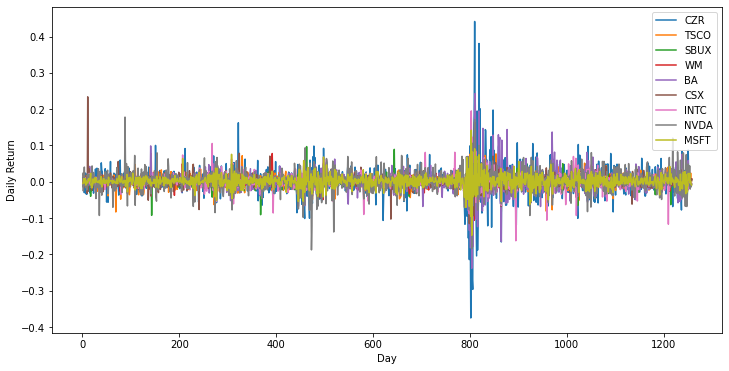

In [ ]:
# Print Plot
df.plot()
plt.xlabel('Day')
plt.ylabel('Daily Return')
plt.show() # Clean up text

By plotting all the graphs together, we can see the similarity of fluctuations in the stock data around March 2020.

In [ ]:
# Avg returns calculated for the selected time period
Avg_Return = pd.DataFrame(np.mean(df) ,columns=["Avg_Return"])
print(Avg_Return)
#Std Deviation is calculated for the Avg returns calculated above for the same time period
Std_Dev_Return = pd.DataFrame(np.std(df) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return)

      Avg_Return
CZR     0.002305
TSCO    0.001135
SBUX    0.000823
WM      0.000847
BA      0.000698
CSX     0.001157
INTC    0.000613
NVDA    0.002397
MSFT    0.001546
      Std_Dev_Return
CZR         0.043354
TSCO        0.018365
SBUX        0.017344
WM          0.012979
BA          0.029653
CSX         0.019771
INTC        0.021841
NVDA        0.029617
MSFT        0.017311


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [ ]:
# Covariance matrix
Covariance_matrix = df.cov()
Covariance_matrix

CZR      TSCO      SBUX        WM        BA       CSX      INTC  \
CZR   0.001881  0.000209  0.000348  0.000171  0.000760  0.000365  0.000346   
TSCO  0.000209  0.000338  0.000101  0.000069  0.000126  0.000118  0.000137   
SBUX  0.000348  0.000101  0.000301  0.000114  0.000262  0.000173  0.000151   
WM    0.000171  0.000069  0.000114  0.000169  0.000148  0.000129  0.000108   
BA    0.000760  0.000126  0.000262  0.000148  0.000880  0.000281  0.000264   
CSX   0.000365  0.000118  0.000173  0.000129  0.000281  0.000391  0.000192   
INTC  0.000346  0.000137  0.000151  0.000108  0.000264  0.000192  0.000477   
NVDA  0.000458  0.000176  0.000192  0.000115  0.000279  0.000238  0.000346   
MSFT  0.000290  0.000141  0.000164  0.000112  0.000211  0.000175  0.000235   

          NVDA      MSFT  
CZR   0.000458  0.000290  
TSCO  0.000176  0.000141  
SBUX  0.000192  0.000164  
WM    0.000115  0.000112  
BA    0.000279  0.000211  
CSX   0.000238  0.000175  
INTC  0.000346  0.000235  
NVDA  0.000878  0.000335  
MSFT  0.000335  0.000300

In [ ]:
# creating covariance table on stock return dataframe
df_cov = df.cov()
print('Covariance Matrix:')
print(df_cov)
print('\n') # return/blank line

# create the average of each stock
# these are the objective function coefficients
df_return = df.mean()
print('Average Return:')
print(df_return)

Covariance Matrix:
           CZR      TSCO      SBUX        WM        BA       CSX      INTC  \
CZR   0.001881  0.000209  0.000348  0.000171  0.000760  0.000365  0.000346   
TSCO  0.000209  0.000338  0.000101  0.000069  0.000126  0.000118  0.000137   
SBUX  0.000348  0.000101  0.000301  0.000114  0.000262  0.000173  0.000151   
WM    0.000171  0.000069  0.000114  0.000169  0.000148  0.000129  0.000108   
BA    0.000760  0.000126  0.000262  0.000148  0.000880  0.000281  0.000264   
CSX   0.000365  0.000118  0.000173  0.000129  0.000281  0.000391  0.000192   
INTC  0.000346  0.000137  0.000151  0.000108  0.000264  0.000192  0.000477   
NVDA  0.000458  0.000176  0.000192  0.000115  0.000279  0.000238  0.000346   
MSFT  0.000290  0.000141  0.000164  0.000112  0.000211  0.000175  0.000235   

          NVDA      MSFT  
CZR   0.000458  0.000290  
TSCO  0.000176  0.000141  
SBUX  0.000192  0.000164  
WM    0.000115  0.000112  
BA    0.000279  0.000211  
CSX   0.000238  0.000175  
INTC  0.000

<ipython-input-188-f0a05a2cb628>:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_return = df.mean()


# **2. Build Optimization Model**

## Objective function and constraints

In [ ]:
from pyomo.environ import *
m = ConcreteModel()

# defining variables
# each one is a stock (CZR, TSCO, SBUX, WM, BA, CSX, INTC, NVDA, MSFT
m.CZR = Var(within=NonNegativeReals, bounds=(0,1))
m.TSCO = Var(within=NonNegativeReals, bounds=(0,1))
m.SBUX = Var(within=NonNegativeReals, bounds=(0,1))
m.WM = Var(within=NonNegativeReals, bounds=(0,1))
m.BA = Var(within=NonNegativeReals, bounds=(0,1))
m.CSX = Var(within=NonNegativeReals, bounds=(0,1))
m.INTC = Var(within=NonNegativeReals, bounds=(0,1))
m.NVDA = Var(within=NonNegativeReals, bounds=(0,1))
m.MSFT = Var(within=NonNegativeReals, bounds=(0,1))

# Defining binary variables
m.CZRy = Var(within=Binary)
m.TSCOy = Var(within=Binary)
m.SBUXy = Var(within=Binary)
m.WMy = Var(within=Binary)
m.BAy = Var(within=Binary)
m.CSXy = Var(within=Binary)
m.INTCy = Var(within=Binary)
m.NVDAy = Var(within=Binary)
m.MSFTy = Var(within=Binary)

In [ ]:
# declaring the  objective function
m.objective = Objective(expr =
                        m.CZRy*m.CZR*df_return[0] +
                        m.TSCOy*m.TSCO*df_return[1] +
                        m.SBUXy*m.SBUX*df_return[2] +
                        m.WMy*m.WM*df_return[3] +
                        m.BAy*m.BA*df_return[4] +
                        m.CSXy*m.CSX*df_return[5] +
                        m.INTCy*m.INTC*df_return[6] +
                        m.NVDAy*m.NVDA*df_return[7] +
                        m.MSFTy*m.MSFT*df_return[8],
                        sense=maximize) # our objective is to maximize our returns

# declare constraints
# 1. Sum of all porportions = 1
m.sum_proportions = Constraint(expr = m.CZR + m.TSCO + m.SBUX + m.WM + m.BA + m.CSX + m.INTC + m.NVDA + m.MSFT == 1)

# 2. Minimum return should be .09%
m.return_floor = Constraint(expr = m.objective >= 0.0009)

In [ ]:
# Defining our binding constraints to select 1 stock per sector
m.l_constraint1 = Constraint(expr = m.CZRy+m.TSCOy+m.SBUXy <= 1)
m.l_constraint2 = Constraint(expr = m.CZRy+m.TSCOy+m.SBUXy >= 1)

m.l_constraint3 = Constraint(expr = m.WMy+m.BAy+m.CSXy <= 1)
m.l_constraint4 = Constraint(expr = m.WMy+m.BAy+m.CSXy >= 1)

m.l_constraint5 = Constraint(expr = m.INTCy+m.NVDAy+m.MSFTy <= 1)
m.l_constraint76= Constraint(expr = m.INTCy+m.NVDAy+m.MSFTy >= 1)

## Set risk ceilings

In [ ]:
# creating calculations table for calculating the risk
# 3. Max risk should be less than 0.0015
max_risk = 0.0015
def calc_risk():
  # this is a list of all of your investment allocations (proportion invested in each stock)
  # this is updated as the model is cranking
  proportions = [ m.CZR, m.TSCO, m.SBUX, m.WM, m.BA, m.CSX, m.INTC, m.NVDA, m.MSFT]
  risk_matrix = [] # an empty list

  for index, col in enumerate(df_cov.columns):
    i = 0
    risk = []
    for row in df_cov[col]:
      risk.append(proportions[index]*row*proportions[i])
      i = i + 1
    risk_matrix.append(risk)
  risk_matrix = pd.DataFrame(risk_matrix)
  return risk_matrix.sum().sum()

# defining risk limits. This is what psioptparam() does.
# risk_limits = [0.001, 0.0015] # this is just two options

# this is a sequence of options - better!
risk_limits = np.arange(0.000065, 0.0009, 0.000005) # take tiny steps
risk_limits

array([6.50e-05, 7.00e-05, 7.50e-05, 8.00e-05, 8.50e-05, 9.00e-05,
       9.50e-05, 1.00e-04, 1.05e-04, 1.10e-04, 1.15e-04, 1.20e-04,
       1.25e-04, 1.30e-04, 1.35e-04, 1.40e-04, 1.45e-04, 1.50e-04,
       1.55e-04, 1.60e-04, 1.65e-04, 1.70e-04, 1.75e-04, 1.80e-04,
       1.85e-04, 1.90e-04, 1.95e-04, 2.00e-04, 2.05e-04, 2.10e-04,
       2.15e-04, 2.20e-04, 2.25e-04, 2.30e-04, 2.35e-04, 2.40e-04,
       2.45e-04, 2.50e-04, 2.55e-04, 2.60e-04, 2.65e-04, 2.70e-04,
       2.75e-04, 2.80e-04, 2.85e-04, 2.90e-04, 2.95e-04, 3.00e-04,
       3.05e-04, 3.10e-04, 3.15e-04, 3.20e-04, 3.25e-04, 3.30e-04,
       3.35e-04, 3.40e-04, 3.45e-04, 3.50e-04, 3.55e-04, 3.60e-04,
       3.65e-04, 3.70e-04, 3.75e-04, 3.80e-04, 3.85e-04, 3.90e-04,
       3.95e-04, 4.00e-04, 4.05e-04, 4.10e-04, 4.15e-04, 4.20e-04,
       4.25e-04, 4.30e-04, 4.35e-04, 4.40e-04, 4.45e-04, 4.50e-04,
       4.55e-04, 4.60e-04, 4.65e-04, 4.70e-04, 4.75e-04, 4.80e-04,
       4.85e-04, 4.90e-04, 4.95e-04, 5.00e-04, 5.05e-04, 5.10e

## Evaluate at each risk ceiling

In [ ]:
# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations
returns = {} # key=risk, value = return
for r in risk_limits:
  m.total_risk = Constraint(expr = calc_risk() <= r)
  # run solver
  #result = SolverFactory('ipopt', executable=ipopt_executable).solve(m).write()
  result = SolverFactory('bonmin', executable='/content/bonmin').solve(m)

  # If solution is not feasible, ignore this run
  if result.solver.termination_condition == TerminationCondition.infeasible:
    continue

  result = result.write()

  # store our allocation proportions
  param_analysis[r] = [m.CZR(), m.TSCO(), m.SBUX(), m.WM(), m.BA(), m.CSX(), m.INTC(), m.NVDA(), m.MSFT()]
  # store our returns
  returns[r] =  m.CZR()*df_return[0] + m.TSCO()*df_return[1] + m.SBUX()*df_return[2] + m.WM()*df_return[3] + m.BA()*df_return[4] + m.CSX()*df_return[5] + m.INTC()*df_return[6] + m.NVDA()*df_return[7] + m.MSFT()*df_return[8]

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
This is usually indicative of a mod

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.14426875114440918
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.13153314590454102
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.12552881240844727
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.08501100540161133
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.1276106834411621
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.11003899574279785
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.11253237724304199
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.21625638008117676
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.10375618934631348
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.11025571823120117
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.15660786628723145
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.11111593246459961
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.10477423667907715
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.1352097988128662
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.11696004867553711
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.11601591110229492
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.09409785270690918
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.1512160301208496
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.08073639869689941
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.15089964866638184
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.1158144474029541
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ===========================

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.11665558815002441
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.1724872589111328
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.10328102111816406
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.11369943618774414
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.18087100982666016
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.1276867389678955
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.09995651245117188
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.1011955738067627
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.1283416748046875
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.09599614143371582
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.15520238876342773
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.15694522857666016
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.16011381149291992
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.08933687210083008
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.12658429145812988
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.0980832576751709
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.11689138412475586
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.17977142333984375
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.23983263969421387
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.24047183990478516
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.16170620918273926
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.11870312690734863
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.0956416130065918
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ===========================

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.09499692916870117
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.11800837516784668
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.1031486988067627
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.09817194938659668
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.15736889839172363
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.08799910545349121
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.09704303741455078
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.08597803115844727
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.13069939613342285
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.11316370964050293
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.10558128356933594
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.14855551719665527
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.06153512001037598
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.06275391578674316
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.07226085662841797
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.06531715393066406
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.07211971282958984
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.0635988712310791
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.061621904373168945
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.06414532661437988
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.06463432312011719
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.07617902755737305
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.06484484672546387
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.06981897354125977
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.07274556159973145
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.06784963607788086
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.062317609786987305
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.0715172290802002
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.06956171989440918
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.06780409812927246
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.06980109214782715
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.08538579940795898
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.07173609733581543
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.08268904685974121
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.0807485580444336
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.07412886619567871
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.06972813606262207
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.08308649063110352
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.09044694900512695
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.08782505989074707
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.08743810653686523
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.10596585273742676
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.08959722518920898
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.07871532440185547
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.08544778823852539
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.08217835426330566
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.08784055709838867
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.09032464027404785
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.09451842308044434
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.085662841796875
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.09443521499633789
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.10033082962036133
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.08804464340209961
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.08913540840148926
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.09176445007324219
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.10472846031188965
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.09459948539733887
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.08567452430725098
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.10126447677612305
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.09274435043334961
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.09726905822753906
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.08812832832336426
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.09258604049682617
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.10496926307678223
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.1051476001739502
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.09299111366271973
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.08669853210449219
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.08968281745910645
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.09174442291259766
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.08599281311035156
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.09691929817199707
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.07960343360900879
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.1110236644744873
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.10405087471008301
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.09470367431640625
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.10469388961791992
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.09405946731567383
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.0921475887298584
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.0897972583770752
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.11824369430541992
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.11206960678100586
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.0977773666381836
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.08692073822021484
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.13317131996154785
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.11436867713928223
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.11101245880126953
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.08790349960327148
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.09823036193847656
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.12474513053894043
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.1517629623413086
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ===========================

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().
This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.14496707916259766
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.18442511558532715
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.14783525466918945
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.17624664306640625
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.2026054859161377
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.15425586700439453
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.16652870178222656
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.1434614658355713
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ===========================

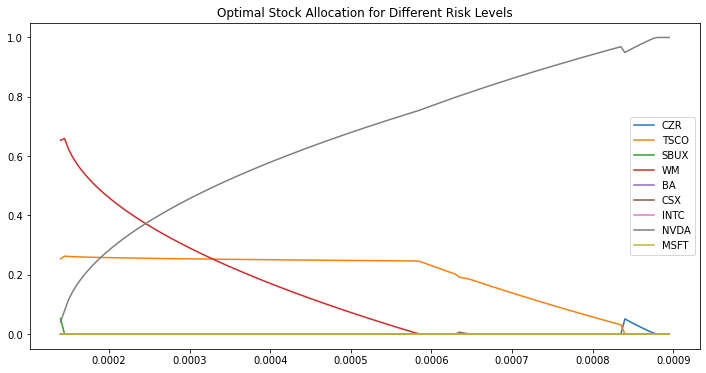

In [ ]:
# generating the dataframe for proportions of the portfolio for each risk limit
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = ['CZR','TSCO','SBUX','WM','BA','CSX','INTC','NVDA','MSFT']
param_analysis.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels')
plt.show()

In the optimal stock allocation graph shown above, we can see that only 1 stock is selected from each sector.

In [ ]:
param_analysis

CZR          TSCO          SBUX            WM  \
0.000140  0.000000e+00  2.537558e-01  5.196304e-02  6.532620e-01   
0.000145  0.000000e+00  2.623287e-01  1.220636e-07  6.593229e-01   
0.000150  0.000000e+00  2.614356e-01  8.917105e-09  6.229559e-01   
0.000155  0.000000e+00  2.607916e-01  6.342500e-09  5.967315e-01   
0.000160  0.000000e+00  2.602607e-01  4.026528e-09  5.751151e-01   
0.000165  0.000000e+00  2.597985e-01  3.662987e-09  5.562940e-01   
0.000170  0.000000e+00  2.593837e-01  2.925871e-09  5.394021e-01   
0.000175  0.000000e+00  2.590041e-01  2.457022e-09  5.239453e-01   
0.000180  0.000000e+00  2.586520e-01  2.124046e-09  5.096102e-01   
0.000185  0.000000e+00  2.583223e-01  1.872524e-09  4.961830e-01   
0.000190  0.000000e+00  2.580110e-01  1.673984e-09  4.835103e-01   
0.000195  0.000000e+00  2.577155e-01  1.510587e-09  4.714778e-01   
0.000200  0.000000e+00  2.574336e-01  1.373273e-09  4.599972e-01   
0.000205  0.000000e+00  2.571635e-01  1.257448e-09  4.489988e-01   
0.000210  0.000000e+00  2.569038e-01  1.157820e-09  4.384266e-01   
0.000215  0.000000e+00  2.566535e-01  1.072132e-09  4.282346e-01   
0.000220  0.000000e+00  2.564116e-01  9.964924e-10  4.183844e-01   
0.000225  0.000000e+00  2.561773e-01  9.286326e-10  4.088439e-01   
0.000230  0.000000e+00  2.559499e-01  8.668607e-10  3.995855e-01   
0.000235  0.000000e+00  2.557289e-01  8.105397e-10  3.905856e-01   
0.000240  0.000000e+00  2.555137e-01  7.591651e-10  3.818237e-01   
0.000245  0.000000e+00  2.553040e-01  7.120603e-10  3.732819e-01   
0.000250  0.000000e+00  2.550992e-01  6.686742e-10  3.649443e-01   
0.000255  0.000000e+00  2.548991e-01  6.285547e-10  3.567969e-01   
0.000260  0.000000e+00  2.547034e-01  5.913082e-10  3.488274e-01   
0.000265  0.000000e+00  2.545118e-01  5.566112e-10  3.410245e-01   
0.000270  0.000000e+00  2.543240e-01  5.241888e-10  3.333783e-01   
0.000275  0.000000e+00  2.541398e-01  4.938054e-10  3.258795e-01   
0.000280  0.000000e+00  2.539591e-01  4.652623e-10  3.185201e-01   
0.000285  0.000000e+00  2.537816e-01  4.383802e-10  3.112926e-01   
0.000290  0.000000e+00  2.536071e-01  4.130040e-10  3.041900e-01   
0.000295  0.000000e+00  2.534356e-01  3.889991e-10  2.972062e-01   
0.000300  0.000000e+00  2.532669e-01  3.662489e-10  2.903353e-01   
0.000305  0.000000e+00  2.531008e-01  3.446697e-10  2.835721e-01   
0.000310  0.000000e+00  2.529372e-01  3.241706e-10  2.769116e-01   
0.000315  0.000000e+00  2.527761e-01  3.046435e-10  2.703493e-01   
0.000320  0.000000e+00  2.526172e-01  2.860149e-10  2.638810e-01   
0.000325  0.000000e+00  2.524606e-01  2.682192e-10  2.575027e-01   
0.000330  0.000000e+00  2.523060e-01  2.511969e-10  2.512109e-01   
0.000335  0.000000e+00  2.521536e-01  2.348945e-10  2.450020e-01   
0.000340  0.000000e+00  2.520030e-01  2.192634e-10  2.388729e-01   
0.000345  0.000000e+00  2.518544e-01  2.042596e-10  2.328205e-01   
0.000350  0.000000e+00  2.517076e-01  1.898429e-10  2.268422e-01   
0.000355  0.000000e+00  2.515625e-01  1.759759e-10  2.209351e-01   
0.000360  0.000000e+00  2.514191e-01  1.626209e-10  2.150969e-01   
0.000365  0.000000e+00  2.512774e-01  1.497518e-10  2.093252e-01   
0.000370  0.000000e+00  2.511372e-01  1.373401e-10  2.036177e-01   
0.000375  0.000000e+00  2.509986e-01  1.253599e-10  1.979723e-01   
0.000380  0.000000e+00  2.508614e-01  1.137870e-10  1.923871e-01   
0.000385  0.000000e+00  2.507257e-01  1.025992e-10  1.868602e-01   
0.000390  0.000000e+00  2.505913e-01  9.177586e-11  1.813898e-01   
0.000395  0.000000e+00  2.504583e-01  8.129798e-11  1.759742e-01   
0.000400  0.000000e+00  2.503266e-01  7.114782e-11  1.706118e-01   
0.000405  0.000000e+00  2.501962e-01  6.130889e-11  1.653010e-01   
0.000410  0.000000e+00  2.500670e-01  5.176586e-11  1.600404e-01   
0.000415  0.000000e+00  2.499390e-01  4.250443e-11  1.548286e-01   
0.000420  0.000000e+00  2.498122e-01  3.351123e-11  1.496643e-01   
0.000425  0.000000e+00  2.496865e-01  2.477377e-11  1.445461e-01   
0.00043

In [ ]:
# printing out the risk levels and their corresponding returns
risk = list(returns.keys()) # coerce dict_keys to a list
print(risk)
reward = list(returns.values()) # coerce dict_values to a list
print(reward)

[0.00014, 0.000145, 0.00015, 0.00015499999999999997, 0.00015999999999999999, 0.000165, 0.00016999999999999999, 0.00017499999999999997, 0.00017999999999999998, 0.000185, 0.00019, 0.00019499999999999997, 0.00019999999999999998, 0.000205, 0.00021, 0.00021499999999999997, 0.00021999999999999998, 0.000225, 0.00023, 0.00023499999999999997, 0.00023999999999999998, 0.000245, 0.00025, 0.00025499999999999996, 0.00026, 0.000265, 0.00027, 0.00027499999999999996, 0.00028, 0.000285, 0.00029, 0.00029499999999999996, 0.0003, 0.000305, 0.00031, 0.000315, 0.00031999999999999997, 0.000325, 0.00033, 0.00033499999999999996, 0.00033999999999999997, 0.000345, 0.00035, 0.000355, 0.00035999999999999997, 0.000365, 0.00037, 0.00037499999999999995, 0.00037999999999999997, 0.000385, 0.00039, 0.000395, 0.00039999999999999996, 0.000405, 0.00041, 0.00041499999999999995, 0.00041999999999999996, 0.000425, 0.00043, 0.000435, 0.00043999999999999996, 0.000445, 0.00045, 0.00045499999999999995, 0.00045999999999999996, 0.000

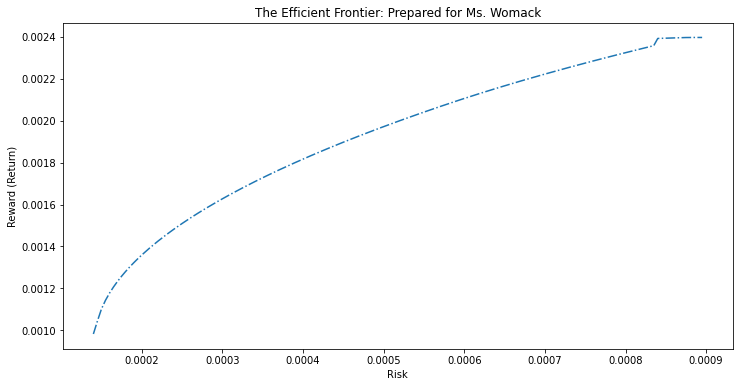

In [ ]:
# plot! pylab makes it easy
from pylab import *
plot(risk, reward, '-.')
title('The Efficient Frontier: Prepared for Ms. Womack')
xlabel('Risk')
ylabel('Reward (Return)')
plt.show()

From this graph, we can observe that with an increase in risk, the returns are also increasing. However after crossing a certain amount of risk, the return remains constant.

# **3. Momentum Trading - TSCO**




Return % for Risk ceiling of **0.0005** for the 3 selected stocks-

**1. TSCO - 0.2479189**

**2. WM - 0.0725961**

**3. NVDA - 0.679485**

We tried 5 different pairs for the moving averages -
7 day - 21 day
9 day - 21 day
7 day - 24 day
7 day - 24 day
5 day - 20 day
Based on our analysis, we decided to go with the 5 day - 20 day strategy.

Below we have provided our analysis with the 5 day - 20 day pair.

In [ ]:
# Install Momentum Trading Packages
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
from datetime import datetime
import pandas_datareader as pdr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Create Trade Trends

In [ ]:
myStock = 'TSCO'
gld = pdr.get_data_yahoo(myStock, start=datetime(2017, 1, 1), end=datetime(2022, 1, 1))
day = np.arange(1, len(gld) + 1) #generate list of trading days
gld['Day'] = day
gld.drop(columns=['Adj Close', 'Volume'], inplace = True)
gld = gld[['Day', 'Open', 'High', 'Low', 'Close']]
gld.head()

Day       Open       High        Low      Close
Date                                                       
2017-01-03    1  76.900002  77.250000  75.730003  75.900002
2017-01-04    2  75.809998  77.160004  75.410004  76.790001
2017-01-05    3  76.330002  77.129997  74.940002  75.629997
2017-01-06    4  75.809998  76.029999  75.080002  75.160004
2017-01-09    5  75.209999  75.629997  74.680000  75.370003

In [ ]:
# shows the different data types
gld.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-01-03 to 2021-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     1259 non-null   int64  
 1   Open    1259 non-null   float64
 2   High    1259 non-null   float64
 3   Low     1259 non-null   float64
 4   Close   1259 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [ ]:
# compute summary statistics of each column
gld.describe()

Day         Open         High          Low        Close
count  1259.000000  1259.000000  1259.000000  1259.000000  1259.000000
mean    630.000000   109.970040   111.327673   108.627411   110.018793
std     363.586303    47.087247    47.549329    46.568609    47.106946
min       1.000000    50.290001    50.610001    49.869999    49.990002
25%     315.500000    74.530003    75.205002    73.389999    74.440002
50%     630.000000    94.269997    95.580002    93.059998    94.190002
75%     944.500000   141.244995   142.915001   139.195000   140.930000
max    1259.000000   238.809998   239.539993   236.229996   238.600006

In [ ]:
# save a copy of the .csv
gld.to_csv('GLD.csv')

In [ ]:
# rolled back (no data leakage)
# since this cell is run after, this overwrites the previous data leakage
gld['5-day'] = gld['Close'].rolling(5).mean().shift()
gld['20-day'] = gld['Close'].rolling(20).mean().shift()
gld.dropna(inplace=True)

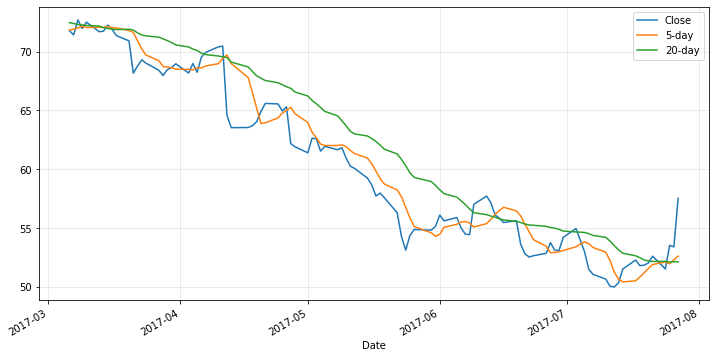

In [ ]:
#buy vs. sell
gld.iloc[22:123,[4,5,6]].plot(figsize=(12,6))
plt.grid(True, alpha = .3)
plt.show()

## Buy & Hold

In [ ]:
gld['logClose'] = np.log(gld['Close']) # price will always be positive, so this operation is well-defined
gld['return'] = gld['logClose'].diff() # the difference will be positive or negative
gld.loc["2021-02-03",'return'] = 0.0
np.exp(np.sum(gld['return'])) -1

2.2569113144295563

## Momentum Trading

In [ ]:
gld['invested'] = np.where(gld['5-day'] > gld['20-day'], 1, 0)
print(gld['invested'].value_counts())
gld['signal'] = gld['invested'].diff()
print(gld['signal'].value_counts())
gld.loc["2021-02-03",'signal'] = 1.0
gld[gld['signal'].isin([1,-1])]
gld['system_return'] = gld['invested'] * gld['return']
gld.head()
np.exp(np.sum(gld['system_return'])) -1

1    737
0    502
Name: invested, dtype: int64
 0.0    1179
 1.0      30
-1.0      29
Name: signal, dtype: int64


2.2231560237182704

## Plot Them

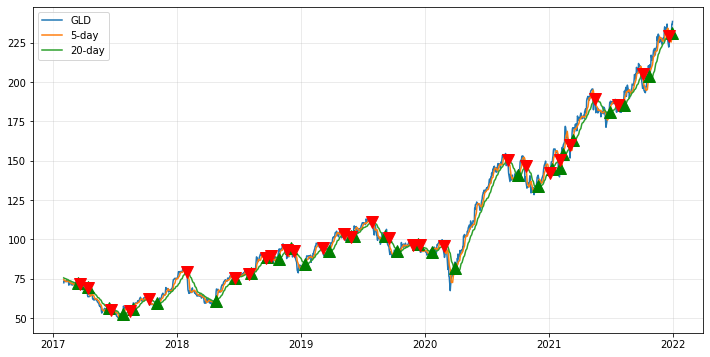

In [ ]:
# show all time
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(gld.iloc[:]['Close'], label = 'GLD') # actual value
plt.plot(gld.iloc[:]['5-day'], label = '5-day') # 5-day average
plt.plot(gld.iloc[:]['20-day'], label = '20-day') # 20-day average
plt.plot(gld[:].loc[gld.signal == 1].index, gld[:]['5-day'][gld.signal == 1], '^',
         color = 'g', markersize = 12)
plt.plot(gld[:].loc[gld.signal == -1].index, gld[:]['20-day'][gld.signal == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

From the graph above, we can see all the instances when we are buying and selling the stock. There are 29 instances of selling the stock and 30 instances of buying the stock.

## Examine Them

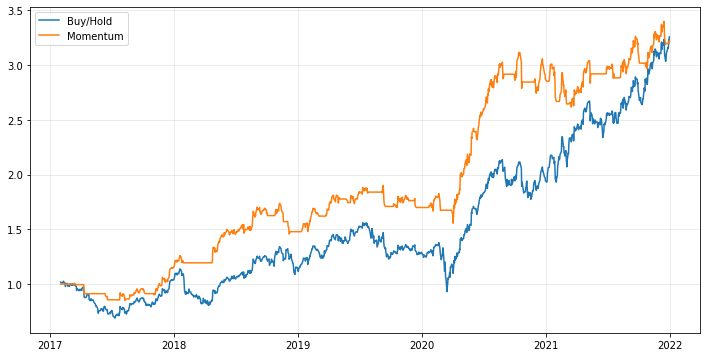

In [ ]:
gld = gld[['Day', 'Open', 'High', 'Low', 'Close',
           '5-day', '20-day',
           'invested', 'logClose',
          'return',
          'signal',  'system_return']]
pd.set_option("display.max_rows", None)

plt.plot(np.exp(gld['return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(gld['system_return']).cumprod(), label='Momentum')
plt.legend(loc=2)
plt.grid(True, alpha=.3)
plt.show()

# Momentum Trading - WM



## Create Trade Trends

In [ ]:
myStock = 'WM'
gld2 = pdr.get_data_yahoo(myStock, start=datetime(2017, 1, 1), end=datetime(2022, 1, 1))
# gld = pdr.get_data_yahoo(myStock)
day = np.arange(1, len(gld2) + 1) #generate list of trading days
gld2['Day'] = day
gld2.drop(columns=['Adj Close', 'Volume'], inplace = True)
gld2 = gld2[['Day', 'Open', 'High', 'Low', 'Close']]
gld2.head()

Day       Open       High        Low      Close
Date                                                       
2017-01-03    1  71.000000  71.279999  70.190002  70.519997
2017-01-04    2  70.750000  71.180000  70.320000  70.320000
2017-01-05    3  70.370003  71.099998  70.290001  70.589996
2017-01-06    4  70.410004  70.800003  70.180000  70.190002
2017-01-09    5  70.349998  70.480003  69.669998  69.779999

In [ ]:
# shows the different data types
gld2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-01-03 to 2021-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     1259 non-null   int64  
 1   Open    1259 non-null   float64
 2   High    1259 non-null   float64
 3   Low     1259 non-null   float64
 4   Close   1259 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [ ]:
# compute summary statistics of each column
gld2.describe()

Day         Open         High          Low        Close
count  1259.000000  1259.000000  1259.000000  1259.000000  1259.000000
mean    630.000000   104.742931   105.532557   103.969809   104.771914
std     363.586303    24.685246    24.911684    24.502878    24.709777
min       1.000000    69.150002    69.610001    69.000000    69.180000
25%     315.500000    83.839996    84.455002    83.250000    83.774998
50%     630.000000   103.529999   104.800003   102.470001   103.860001
75%     944.500000   116.865002   117.950001   116.105000   116.985001
max    1259.000000   167.000000   168.039993   165.440002   166.899994

In [ ]:
# save a copy of the .csv for use later if we need it
# this has downloaded on the left to your local runtime
gld2.to_csv('GLD2.csv')

In [ ]:
# rolled back (no data leakage)
# since this cell is run after, this overwrites the previous data leakage
gld2['5-day'] = gld2['Close'].rolling(5).mean().shift()
gld2['20-day'] = gld2['Close'].rolling(20).mean().shift()
gld2.dropna(inplace=True)
gld2.head()


Day       Open       High        Low      Close   5-day     20-day
Date                                                                          
2017-02-01   21  69.320000  69.610001  69.000000  69.180000  69.628  69.801999
2017-02-02   22  69.150002  69.699997  69.059998  69.639999  69.530  69.734999
2017-02-03   23  69.779999  69.989998  69.580002  69.650002  69.512  69.700999
2017-02-06   24  69.809998  69.930000  69.309998  69.419998  69.514  69.654000
2017-02-07   25  69.480003  70.089996  69.459999  69.900002  69.478  69.615499

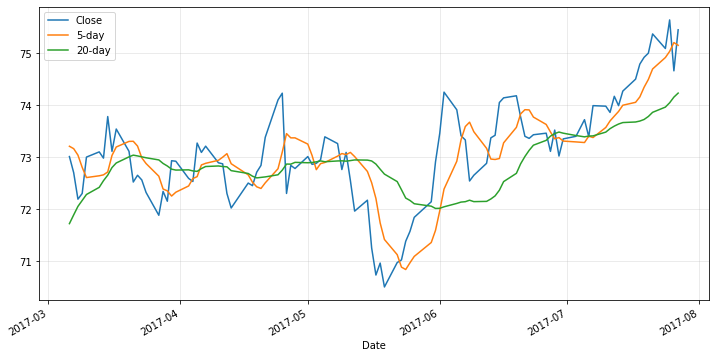

In [ ]:
# imagine where you would put markers on the plot
# for buy vs. sell...

# the 22:123 shows the first 100 days of trading
gld2.iloc[22:123,[4,5,6]].plot(figsize=(12,6))
plt.grid(True, alpha = .3)
plt.show()

## Buy & Hold

In [ ]:
gld2['logClose'] = np.log(gld2['Close']) # price will always be positive, so this operation is well-defined
gld2['return'] = gld2['logClose'].diff() # the difference will be positive or negative
gld2.loc["2021-02-03",'return'] = 0.0
np.exp(np.sum(gld2['return'])) -1

1.4293155808012994

## Momentum Trading

In [ ]:
gld2['invested'] = np.where(gld2['5-day'] > gld2['20-day'], 1, 0)
print(gld2['invested'].value_counts())
gld2['signal'] = gld2['invested'].diff()
print(gld2['signal'].value_counts())
gld2.loc["2021-02-03",'signal'] = 1.0
gld2[gld2['signal'].isin([1,-1])]
gld2['system_return'] = gld2['invested'] * gld2['return']
gld2.head()
np.exp(np.sum(gld2['system_return'])) -1

1    823
0    416
Name: invested, dtype: int64
 0.0    1155
 1.0      42
-1.0      41
Name: signal, dtype: int64


0.5585224752943891

## Plot Them

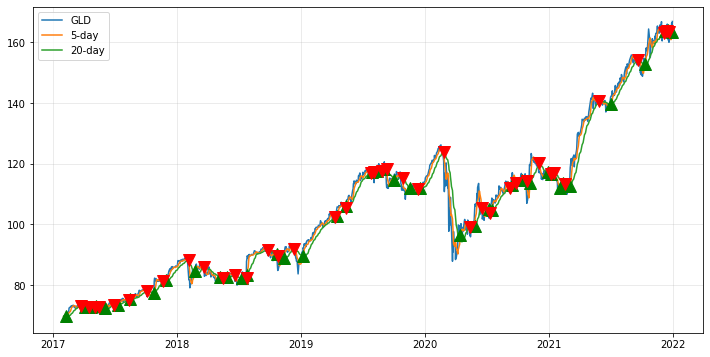

In [ ]:
# show all time
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(gld2.iloc[:]['Close'], label = 'GLD') # actual value
plt.plot(gld2.iloc[:]['5-day'], label = '5-day') # 5-day average
plt.plot(gld2.iloc[:]['20-day'], label = '20-day') # 20-day average
plt.plot(gld2[:].loc[gld2.signal == 1].index, gld2[:]['5-day'][gld2.signal == 1], '^',
         color = 'g', markersize = 12)
plt.plot(gld2[:].loc[gld2.signal == -1].index, gld2[:]['20-day'][gld2.signal == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

## Examine Them

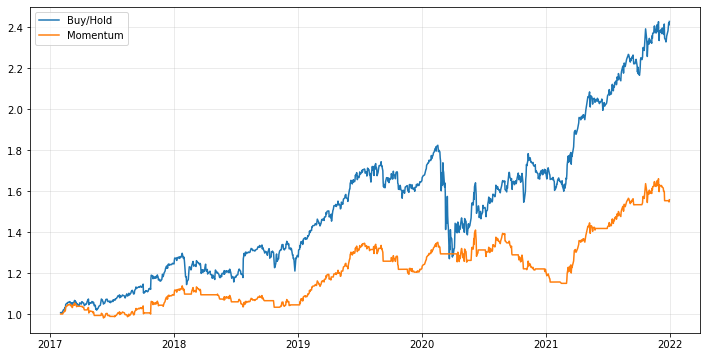

In [ ]:
gld2 = gld2[['Day', 'Open', 'High', 'Low', 'Close',
           '5-day', '20-day',
           'invested', 'logClose',
          'return',
          'signal',  'system_return']]
pd.set_option("display.max_rows", None)

plt.plot(np.exp(gld2['return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(gld2['system_return']).cumprod(), label='Momentum')
plt.legend(loc=2)
plt.grid(True, alpha=.3)
plt.show()

# Momentum Trading - NVDA

## Create Trade Trends

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-01-03 to 2021-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     1259 non-null   int64  
 1   Open    1259 non-null   float64
 2   High    1259 non-null   float64
 3   Low     1259 non-null   float64
 4   Close   1259 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


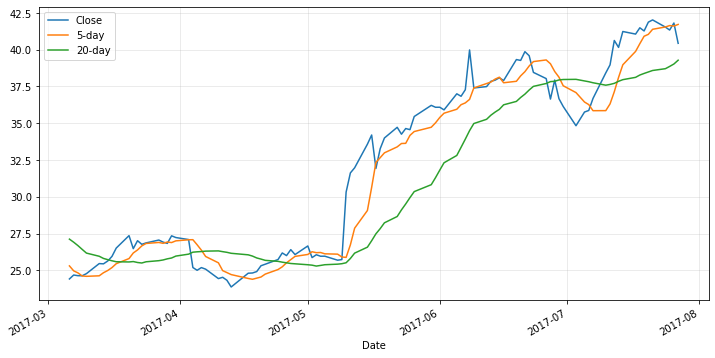

In [ ]:
myStock = 'NVDA'
gld3 = pdr.get_data_yahoo(myStock, start=datetime(2017, 1, 1), end=datetime(2022, 1, 1))
# gld = pdr.get_data_yahoo(myStock)
day = np.arange(1, len(gld3) + 1) #generate list of trading days
gld3['Day'] = day
gld3.drop(columns=['Adj Close', 'Volume'], inplace = True)
gld3 = gld3[['Day', 'Open', 'High', 'Low', 'Close']]
gld3.head()

# shows the different data types
gld3.info()

# compute summary statistics of each column
gld3.describe()

# save a copy of the .csv for use later if we need it
# this has downloaded on the left to your local runtime
gld3.to_csv('gld3.csv')

# rolled back (no data leakage)
# since this cell is run after, this overwrites the previous data leakage
# you can comment out the cell above and run all if you are nervous!
gld3['5-day'] = gld3['Close'].rolling(5).mean().shift()
gld3['20-day'] = gld3['Close'].rolling(20).mean().shift()
gld3.dropna(inplace=True)
gld3.head()

# imagine where you would put markers on the plot
# for buy vs. sell...

# the 22:123 shows the first 100 days of trading
gld3.iloc[22:123,[4,5,6]].plot(figsize=(12,6))
plt.grid(True, alpha = .3)
plt.show()

## Buy & Hold

In [ ]:
gld3['logClose'] = np.log(gld3['Close']) # price will always be positive, so this operation is well-defined
gld3['return'] = gld3['logClose'].diff() # the difference will be positive or negative
gld3.loc["2021-02-03",'return'] = 0.0
np.exp(np.sum(gld3['return'])) -1

9.34420750230075

## Momentum Trading

In [ ]:
gld3['invested'] = np.where(gld3['5-day'] > gld3['20-day'], 1, 0)
print(gld3['invested'].value_counts())
gld3['signal'] = gld3['invested'].diff()
print(gld3['signal'].value_counts())
gld3.loc["2021-02-03",'signal'] = 1.0
gld3[gld3['signal'].isin([1,-1])]
gld3['system_return'] = gld3['invested'] * gld3['return']
gld3.head()
np.exp(np.sum(gld3['system_return'])) -1

1    822
0    417
Name: invested, dtype: int64
 0.0    1162
-1.0      38
 1.0      38
Name: signal, dtype: int64


3.375817623125359

## Plot Them

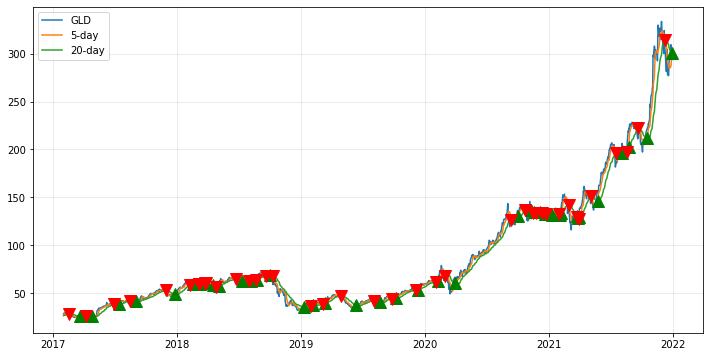

In [ ]:
# show all time
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(gld3.iloc[:]['Close'], label = 'GLD') # actual value
plt.plot(gld3.iloc[:]['5-day'], label = '5-day') # 5-day average
plt.plot(gld3.iloc[:]['20-day'], label = '20-day') # 20-day average
plt.plot(gld3[:].loc[gld3.signal == 1].index, gld3[:]['5-day'][gld3.signal == 1], '^',
         color = 'g', markersize = 12)
plt.plot(gld3[:].loc[gld3.signal == -1].index, gld3[:]['20-day'][gld3.signal == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

## Examine Them

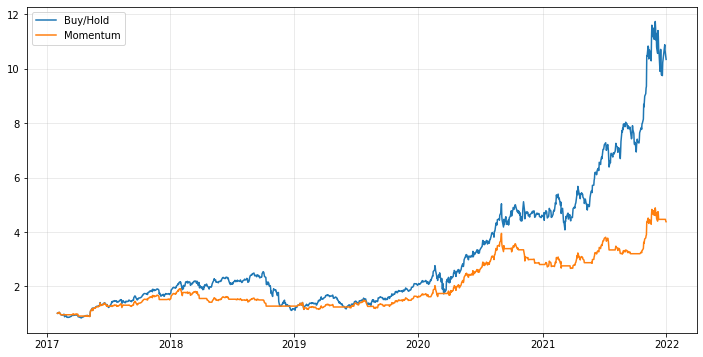

In [ ]:
gld3 = gld3[['Day', 'Open', 'High', 'Low', 'Close',
           '5-day', '20-day',
           'invested', 'logClose',
          'return',
          'signal',  'system_return']]
pd.set_option("display.max_rows", None)

plt.plot(np.exp(gld3['return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(gld3['system_return']).cumprod(), label='Momentum')
plt.legend(loc=2)
plt.grid(True, alpha=.3)
plt.show()

# **4. Analysis**

## **Buy & Hold Strategy**

In [ ]:
# Creating a ticker list
tickers_list = ['TSCO','WM','NVDA']
# Extracting historical stock price data (Monthly price) until November 2nd 2022
dow_prices = {ticker : si.get_data(ticker,start_date = '12/31/2021',end_date='11/02/2022',interval='1mo') for ticker in tickers_list}

In [ ]:
prep_data = pd.DataFrame()

# Using the Tickers to add data
for i in tickers_list[0:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])

In [ ]:
prep_data['inv_val_tsco']=100000*0.2479189
prep_data['inv_val_wm']=100000*0.072596
prep_data['inv_val_nvda']=100000*0.679485

In [ ]:
prep_data.head()

TSCO          WM        NVDA  inv_val_tsco  inv_val_wm  \
2022-01-01  214.353989  148.061310  244.631256      24791.89      7259.6   
2022-02-01  200.097107  142.116806  243.622192      24791.89      7259.6   
2022-03-01  230.125580  155.993866  272.605103      24791.89      7259.6   
2022-04-01  198.649338  162.520767  185.328308      24791.89      7259.6   
2022-05-01  184.755219  156.659958  186.577362      24791.89      7259.6   

            inv_val_nvda  
2022-01-01       67948.5  
2022-02-01       67948.5  
2022-03-01       67948.5  
2022-04-01       67948.5  
2022-05-01       67948.5

In [ ]:
shares_tsco=prep_data.iloc[0,3]/prep_data.iloc[0,0]
shares_wm=prep_data.iloc[0,4]/prep_data.iloc[0,1]
shares_nvda=prep_data.iloc[0,5]/prep_data.iloc[0,2]

In [ ]:
prep_data['shares_tsco']=shares_tsco
prep_data['shares_wm']=shares_wm
prep_data['shares_nvda']=shares_nvda

In [ ]:
prep_data=prep_data.reset_index()
prep_data=prep_data.rename(columns={'index':'Date'})

In [ ]:
prep_data.head()

Date        TSCO          WM        NVDA  inv_val_tsco  inv_val_wm  \
0 2022-01-01  214.353989  148.061310  244.631256      24791.89      7259.6   
1 2022-02-01  200.097107  142.116806  243.622192      24791.89      7259.6   
2 2022-03-01  230.125580  155.993866  272.605103      24791.89      7259.6   
3 2022-04-01  198.649338  162.520767  185.328308      24791.89      7259.6   
4 2022-05-01  184.755219  156.659958  186.577362      24791.89      7259.6   

   inv_val_nvda  shares_tsco  shares_wm  shares_nvda  
0       67948.5   115.658636   49.03104   277.758865  
1       67948.5   115.658636   49.03104   277.758865  
2       67948.5   115.658636   49.03104   277.758865  
3       67948.5   115.658636   49.03104   277.758865  
4       67948.5   115.658636   49.03104   277.758865

In [ ]:
for i in range(1,prep_data.shape[0]):
  prep_data.iloc[i:,4]=prep_data.loc[i:,'shares_tsco']*prep_data.loc[i:,'TSCO']
  prep_data.iloc[i:,5]=prep_data.loc[i:,'shares_wm']*prep_data.loc[i:,'WM']
  prep_data.iloc[i:,6]=prep_data.loc[i:,'shares_nvda']*prep_data.loc[i:,'NVDA']

In [ ]:
prep_data.head()

Date        TSCO          WM        NVDA  inv_val_tsco   inv_val_wm  \
0 2022-01-01  214.353989  148.061310  244.631256  24791.890000  7259.600000   
1 2022-02-01  200.097107  142.116806  243.622192  23142.958504  6968.134797   
2 2022-03-01  230.125580  155.993866  272.605103  26616.010728  7648.541478   
3 2022-04-01  198.649338  162.520767  185.328308  22975.511497  7968.562234   
4 2022-05-01  184.755219  156.659958  186.577362  21368.536611  7681.200657   

   inv_val_nvda  shares_tsco  shares_wm  shares_nvda  
0  67948.500000   115.658636   49.03104   277.758865  
1  67668.223606   115.658636   49.03104   277.758865  
2  75718.483831   115.658636   49.03104   277.758865  
3  51476.580482   115.658636   49.03104   277.758865  
4  51823.516291   115.658636   49.03104   277.758865

In [ ]:
# Value of TSCO, WM, NVDA on the first of every month
prep_data=prep_data[['Date','inv_val_tsco','inv_val_wm','inv_val_nvda']]

In [ ]:
# Calculating the aggregate value of the stocks on the first of every month
prep_data['Aggregate_val']=prep_data['inv_val_nvda']+prep_data['inv_val_tsco']+prep_data['inv_val_wm']

<ipython-input-165-3f43ad18773f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prep_data['Aggregate_val']=prep_data['inv_val_nvda']+prep_data['inv_val_tsco']+prep_data['inv_val_wm']


## **Value of Each Stock / Aggregate Value - Buy & Hold Strategy**

In [ ]:
prep_data

Date  inv_val_tsco   inv_val_wm  inv_val_nvda  Aggregate_val
0  2022-01-01  24791.890000  7259.600000  67948.500000   99999.990000
1  2022-02-01  23142.960151  6968.134827  67668.232065   97779.327044
2  2022-03-01  26616.012623  7648.541438  75718.488554  109983.042614
3  2022-04-01  22975.513132  7968.560664  51476.583693   82420.657490
4  2022-05-01  21368.539897  7681.199866  51823.515285   80873.255048
5  2022-06-01  22224.351392  7413.222995  42073.299505   71710.873892
6  2022-07-01  21952.637582  8007.206570  50421.463584   80381.307737
7  2022-08-01  21226.920885  8224.709217  41901.751524   71353.381625
8  2022-09-01  21406.583925  7795.543268  33698.514889   62900.642081
9  2022-10-01  25309.473729  7734.951006  37479.529711   70523.954446
10 2022-11-01  26062.642059  8191.615363  46993.110487   81247.367909

## 2022 Momentum Trading

### TSCO

In [ ]:
# Install Momentum Trading Packages
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
from datetime import datetime
import pandas_datareader as pdr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
myStock = 'TSCO'
gldf = pdr.get_data_yahoo(myStock, start=datetime(2022, 1, 1), end=datetime(2022, 11, 1),interval='m')
day = np.arange(1, len(gldf) + 1) #generate list of trading days
gldf['Day'] = day
gldf.drop(columns=['Adj Close', 'Volume'], inplace = True)
gldf = gldf[['Day', 'Open', 'High', 'Low', 'Close']]
gldf.head()

Day        Open        High         Low       Close
Date                                                           
2022-01-01    1  238.350006  239.860001  204.770004  218.309998
2022-02-01    2  218.470001  226.309998  186.669998  203.789993
2022-03-01    3  203.770004  241.539993  203.179993  233.369995
2022-04-01    4  233.710007  241.399994  200.940002  201.449997
2022-05-01    5  202.139999  213.059998  166.490005  187.360001

In [ ]:
myStock = 'TSCO'
gldfa = pdr.get_data_yahoo(myStock, start=datetime(2021, 12, 1), end=datetime(2022, 11, 1))
day = np.arange(1, len(gldfa) + 1) #generate list of trading days
gldfa['Day'] = day
gldfa.drop(columns=['Adj Close', 'Volume'], inplace = True)
gldfa = gldfa[['Day', 'Open', 'High', 'Low', 'Close']]
gldfa.head()

Day        Open        High         Low       Close
Date                                                           
2021-12-01    1  226.110001  229.009995  223.919998  223.919998
2021-12-02    2  224.320007  229.679993  223.630005  227.649994
2021-12-03    3  229.289993  230.910004  226.070007  227.960007
2021-12-06    4  229.100006  230.380005  225.800003  227.460007
2021-12-07    5  229.490005  234.899994  228.699997  233.339996

In [ ]:
# save a copy of the .csv
gldfa.to_csv('GLD.csv')

In [ ]:
# rolled back (no data leakage)
# since this cell is run after, this overwrites the previous data leakage
gldfa['5-day'] = gldfa['Close'].rolling(5).mean().shift()
gldfa['20-day'] = gldfa['Close'].rolling(20).mean().shift()
gldfa.dropna(inplace=True)

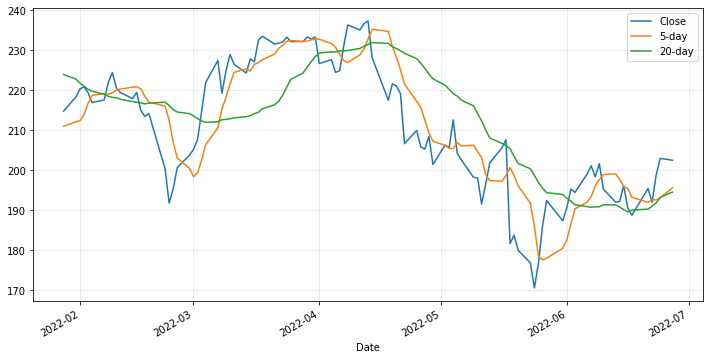

In [ ]:
gldfa.iloc[20:123,[4,5,6]].plot(figsize=(12,6))
plt.grid(True, alpha = .3)
plt.show()

### WM

In [ ]:
myStock = 'WM'
gld2f = pdr.get_data_yahoo(myStock, start=datetime(2022, 1, 1), end=datetime(2022, 11, 1),interval='m')
day = np.arange(1, len(gld2f) + 1) #generate list of trading days
gld2f['Day'] = day
gld2f.drop(columns=['Adj Close', 'Volume'], inplace = True)
gld2f = gldf[['Day', 'Open', 'High', 'Low', 'Close']]
gld2f

Day        Open        High         Low       Close
Date                                                           
2022-01-01    1  238.350006  239.860001  204.770004  218.309998
2022-02-01    2  218.470001  226.309998  186.669998  203.789993
2022-03-01    3  203.770004  241.539993  203.179993  233.369995
2022-04-01    4  233.710007  241.399994  200.940002  201.449997
2022-05-01    5  202.139999  213.059998  166.490005  187.360001
2022-06-01    6  189.009995  205.369995  186.160004  193.850006
2022-07-01    7  194.410004  208.330002  182.470001  191.479996
2022-08-01    8  191.020004  206.839996  185.139999  185.149994
2022-09-01    9  183.839996  205.440002  181.399994  185.880005
2022-10-01   10  187.000000  224.089996  186.350006  219.770004
2022-11-01   11  221.190002  228.100006  200.940002  226.309998

In [ ]:
myStock = 'WM'
gld2fa = pdr.get_data_yahoo(myStock, start=datetime(2021, 12, 1), end=datetime(2022, 11, 1))
day = np.arange(1, len(gld2fa) + 1) #generate list of trading days
gld2fa['Day'] = day
gld2fa.drop(columns=['Adj Close', 'Volume'], inplace = True)
gld2fa = gld2fa[['Day', 'Open', 'High', 'Low', 'Close']]
gld2fa.head()

Day        Open        High         Low       Close
Date                                                           
2021-12-01    1  161.979996  164.610001  160.369995  160.509995
2021-12-02    2  160.979996  164.770004  160.539993  163.740005
2021-12-03    3  164.300003  164.869995  161.679993  163.220001
2021-12-06    4  164.800003  165.740005  163.220001  163.479996
2021-12-07    5  165.100006  166.759995  163.500000  164.250000

In [ ]:
# save a copy of the .csv
gld2fa.to_csv('GLD.csv')

In [ ]:
# rolled back (no data leakage)
# since this cell is run after, this overwrites the previous data leakage
gld2fa['5-day'] = gld2fa['Close'].rolling(5).mean().shift()
gld2fa['20-day'] = gld2fa['Close'].rolling(20).mean().shift()
gld2fa.dropna(inplace=True)

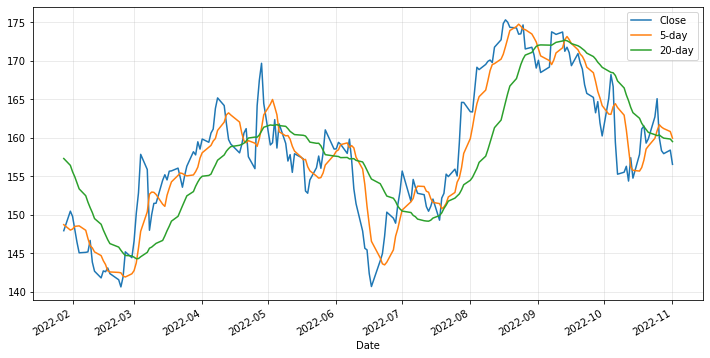

In [ ]:
gld2fa.iloc[20:300,[4,5,6]].plot(figsize=(12,6))
plt.grid(True, alpha = .3)
plt.show()

### NVDA

In [ ]:
myStock = 'NVDA'
gld3f = pdr.get_data_yahoo(myStock, start=datetime(2022, 1, 1), end=datetime(2022, 11, 1),interval='m')
day = np.arange(1, len(gld3f) + 1) #generate list of trading days
gld3f['Day'] = day
gld3f.drop(columns=['Adj Close', 'Volume'], inplace = True)
gld3f = gldf[['Day', 'Open', 'High', 'Low', 'Close']]
gld3f

Day        Open        High         Low       Close
Date                                                           
2022-01-01    1  238.350006  239.860001  204.770004  218.309998
2022-02-01    2  218.470001  226.309998  186.669998  203.789993
2022-03-01    3  203.770004  241.539993  203.179993  233.369995
2022-04-01    4  233.710007  241.399994  200.940002  201.449997
2022-05-01    5  202.139999  213.059998  166.490005  187.360001
2022-06-01    6  189.009995  205.369995  186.160004  193.850006
2022-07-01    7  194.410004  208.330002  182.470001  191.479996
2022-08-01    8  191.020004  206.839996  185.139999  185.149994
2022-09-01    9  183.839996  205.440002  181.399994  185.880005
2022-10-01   10  187.000000  224.089996  186.350006  219.770004
2022-11-01   11  221.190002  228.100006  200.940002  226.309998

In [ ]:
myStock = 'NVDA'
gld3fa = pdr.get_data_yahoo(myStock, start=datetime(2021, 12, 1), end=datetime(2022, 11, 1))
day = np.arange(1, len(gld3fa) + 1) #generate list of trading days
gld3fa['Day'] = day
gld3fa.drop(columns=['Adj Close', 'Volume'], inplace = True)
gld3fa = gld3fa[['Day', 'Open', 'High', 'Low', 'Close']]
gld3fa.head()

Day        Open        High         Low       Close
Date                                                           
2021-12-01    1  332.190002  332.890015  313.799988  314.350006
2021-12-02    2  312.140015  324.779999  310.250000  321.260010
2021-12-03    3  320.000000  321.290009  301.299988  306.929993
2021-12-06    4  298.799988  302.410004  280.380005  300.369995
2021-12-07    5  309.570007  324.489990  306.510010  324.269989

In [ ]:
# save a copy of the .csv
gld3fa.to_csv('GLD.csv')

In [ ]:
# rolled back (no data leakage)
# since this cell is run after, this overwrites the previous data leakage
gld3fa['5-day'] = gld3fa['Close'].rolling(5).mean().shift()
gld3fa['20-day'] = gld3fa['Close'].rolling(20).mean().shift()
gld3fa.dropna(inplace=True)

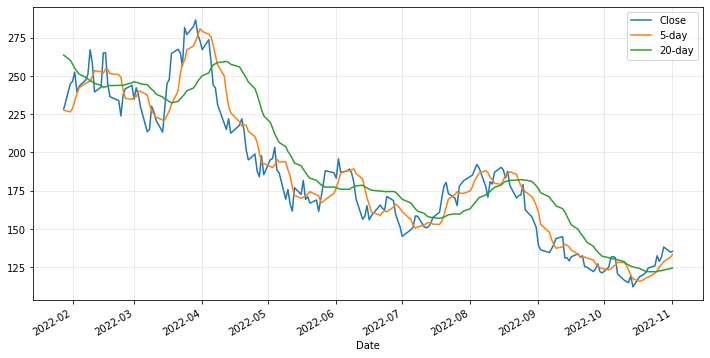

In [ ]:
gld3fa.iloc[20:300,[4,5,6]].plot(figsize=(12,6))
plt.grid(True, alpha = .3)
plt.show()

## **Comparing Against S&P 500**

In [ ]:
tickers_list = ['^GSPC']

# Extracting historical S&P Prices - Monthly Prices
s_p = {ticker : si.get_data(ticker,start_date = '12/31/2021',end_date='11/02/2022',interval='1mo') for ticker in tickers_list}


S_P500 = pd.DataFrame()

# Using the Tickers to add data to the DataFrame created
for i in tickers_list[0:]:
  S_P500[i] = pd.DataFrame(s_p[i]['adjclose'])

# Printing the DataFrame
S_P500

^GSPC
2022-01-01  4515.549805
2022-02-01  4373.939941
2022-03-01  4530.410156
2022-04-01  4131.930176
2022-05-01  4132.149902
2022-06-01  3785.379883
2022-07-01  4130.290039
2022-08-01  3955.000000
2022-09-01  3585.620117
2022-10-01  3871.979980
2022-11-01  4080.110107

In [ ]:
# Including Percentage Difference in the DataFrame
S_P500['PercDiff']=S_P500['^GSPC'].pct_change()

#Imputing Missing Values
S_P500=S_P500.fillna(0)

# Adding the Value of Investment at the beginning of each month
S_P500['Invst_Value']=100000*(1+S_P500['PercDiff'])

### Printing Value of Investment after Investing $100,000 in S&P Index

In [ ]:
# Printing Value of Investment after Investing $100,000 in S&P Index
S_P500

^GSPC  PercDiff    Invst_Value
2022-01-01  4515.549805  0.000000  100000.000000
2022-02-01  4373.939941 -0.031360   96863.950805
2022-03-01  4530.410156  0.035773  103577.328837
2022-04-01  4131.930176 -0.087957   91204.328820
2022-05-01  4132.149902  0.000053  100005.317770
2022-06-01  3785.379883 -0.083920   91608.000007
2022-07-01  4130.290039  0.091116  109111.639173
2022-08-01  3955.000000 -0.042440   95755.987173
2022-09-01  3585.620117 -0.093396   90660.432799
2022-10-01  3871.979980  0.079863  107986.341384
2022-11-01  4080.110107  0.053753  105375.289335

# **Conclusions**

1. Investment strategies that have higher returns and lower risks are generally favored over the others.
2. how much risk we are willing to take can often determine your investment strategies.
3. Allocating your stocks in different sectors, i.e., diversifying your investments insures that fluctuations in the market do not affect your returns greatly.
4. For all 3 stocks, the Buy & Hold strategy performed better that the MT strategy from 2017 to 2021.
5. For the momentum trading statergy, we noticed that using a shorter time frame for our intervals made our graph more reactive and followed the trend better than when we used longer intervals.

## **Listing of each group member’s contribution**

We utilized pair programming and collaborated during the coding of the file.

Every member of the team was present during all the meetings and actively made contributions to the progress of the project.